In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("delhiaqi.csv")
print(data.head())

                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  


In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094


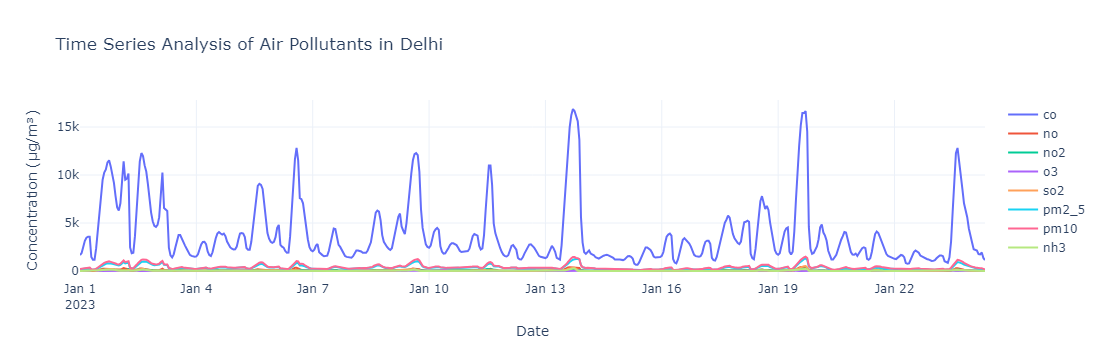

In [16]:
# time series plot for each air pollutant
fig = go.Figure()

for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    fig.add_trace(go.Scatter(x=data['date'], y=data[pollutant], mode='lines', 
                             name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Delhi',
                  xaxis_title='Date', yaxis_title='Concentration (µg/m³)')
fig.show()

In [12]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
data['AQI'] = data.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
print(data.head())

                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  AQI    AQI Category  
0   5.83  300  Very Unhealthy  
1   7.66  300  Very Unhealthy  
2  11.40  400       Hazardous  
3  13.55  400       Hazardous  
4  14.19  400       Hazardous  


In [13]:
print(data.columns)

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'AQI',
       'AQI Category'],
      dtype='object')


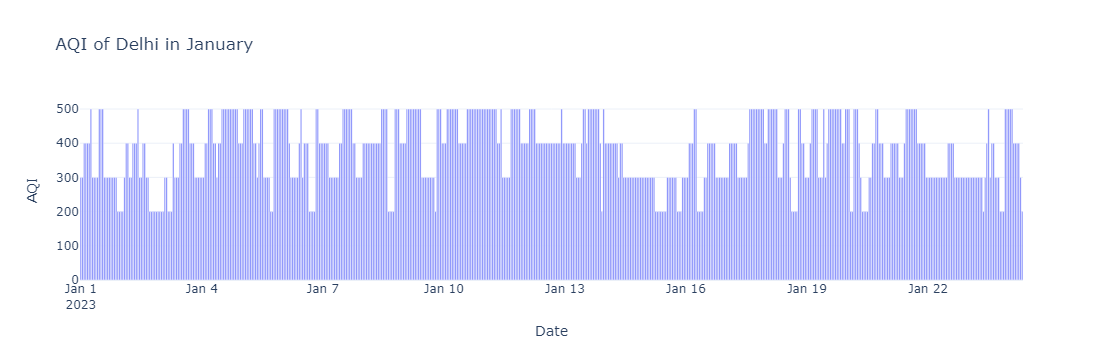

In [14]:
# AQI over time
fig = px.bar(data, x="date", y="AQI", 
             title="AQI of Delhi in January")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="AQI")
fig.show()

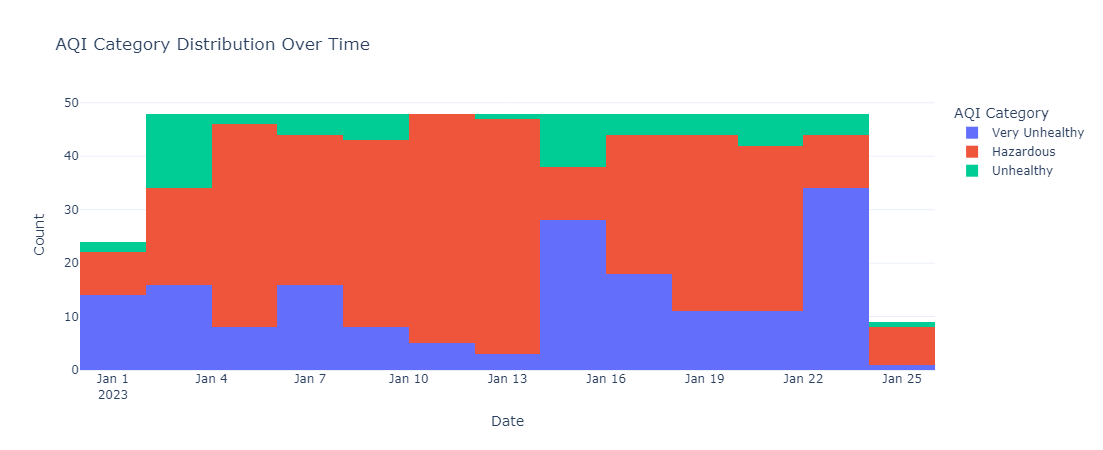

In [38]:
fig = px.histogram(data, x="date", 
                    color="AQI Category", 
                    title="AQI Category Distribution Over Time")
fig.update_layout(width=900, height=450,
                  xaxis_title="Date", yaxis_title="Count")
fig.show()

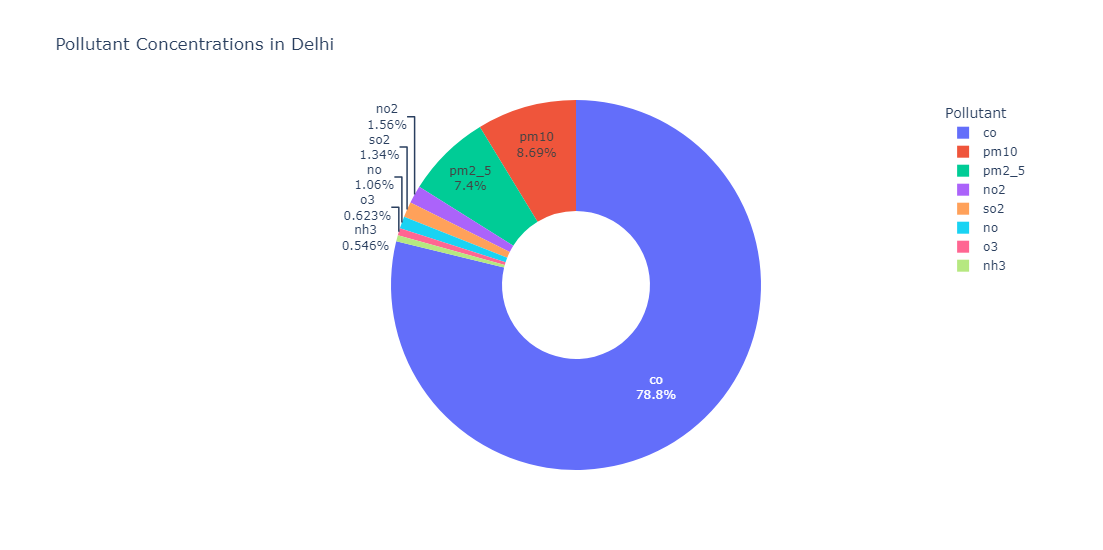

In [36]:
# Define pollutants and their colors
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = data[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Delhi",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant",width=800, height=550) 

# Show the donut plot
fig.show()

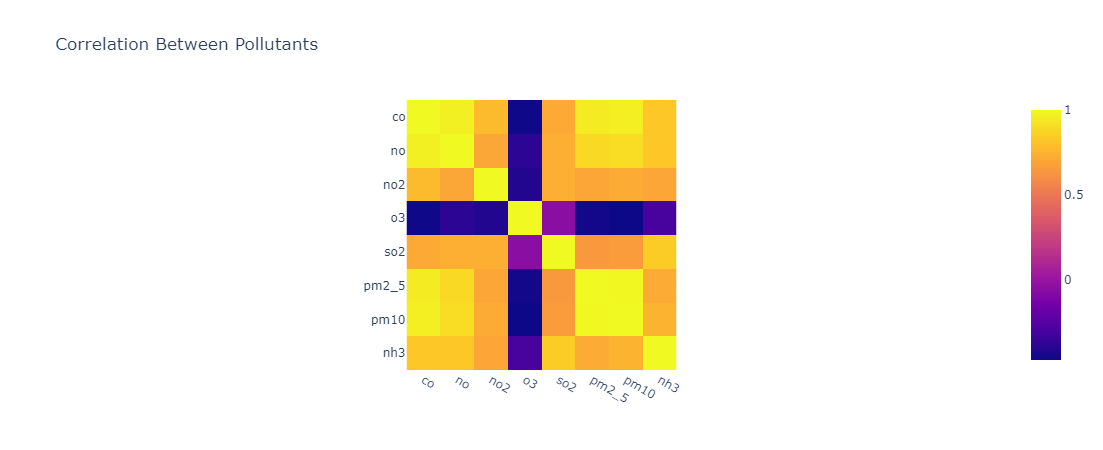

In [34]:
# Correlation Between Pollutants
correlation_matrix = data[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, 
                 y=pollutants, title="Correlation Between Pollutants",width=700, height=450)
fig.show()

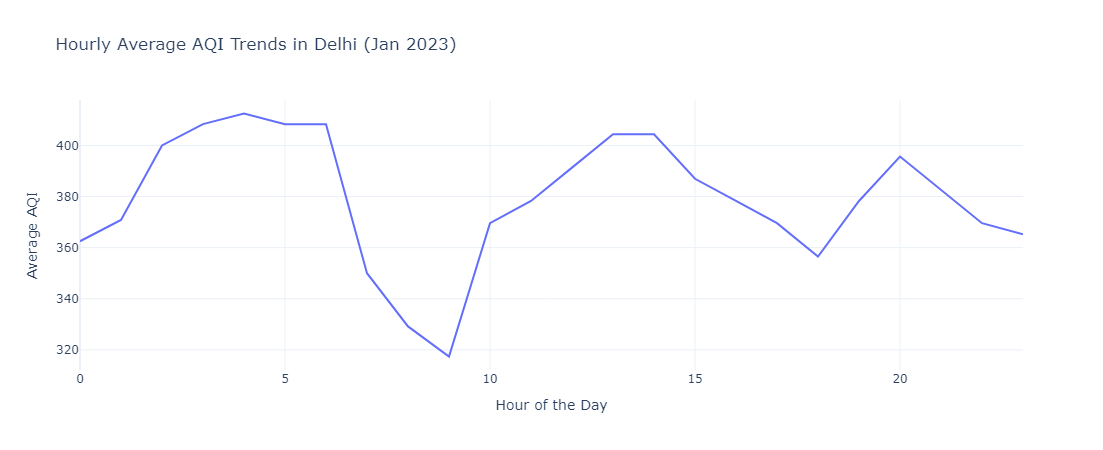

In [32]:
# Extract the hour from the date
data['Hour'] = pd.to_datetime(data['date']).dt.hour

# Calculate hourly average AQI
hourly_avg_aqi = data.groupby('Hour')['AQI'].mean().reset_index()

# Create a line plot for hourly trends in AQI
fig = px.line(hourly_avg_aqi, x='Hour', y='AQI', 
              title='Hourly Average AQI Trends in Delhi (Jan 2023)')
fig.update_xaxes(title="Hour of the Day")
fig.update_yaxes(title="Average AQI")
fig.update_layout(width=700, height=450, 
                  xaxis_title="Hour of the Day", yaxis_title="Average AQI")
fig.show()

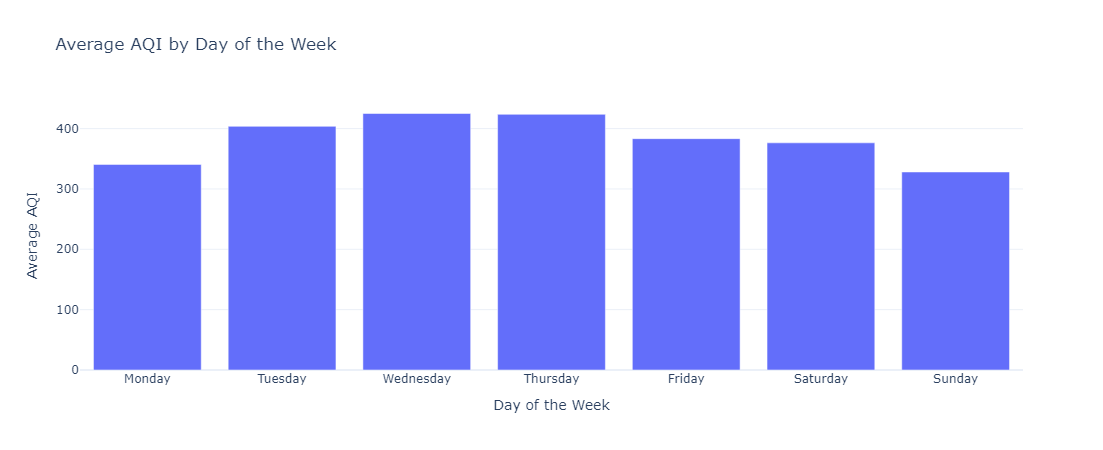

In [33]:
# Average AQI by Day of the Week
data['Day_of_Week'] = data['date'].dt.day_name()
average_aqi_by_day = data.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y='AQI', 
              title='Average AQI by Day of the Week')
fig.update_layout(width=700, height=450, 
                  xaxis_title="Day of the Week", yaxis_title="Average AQI")
fig.show()